In [1]:
# For data analysis
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set up the Titanic csv file as a DataFrame

train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# General glimpse of the dataframe

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We see that "Age" is missing few values, "Cabin" is missing most of the values, and "Embarked" is missing couple of values so we will try to fill up those values using certain parameters and methods later on. I neglected the column "Cabin" completely as it has more than 3/4th values missing and guessing them might lead to erroneous predictions in future

In [5]:
#Statistical glimpse of the Dataframe

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Drop the "Cabin" Column
train_df.drop("Cabin", axis = 1, inplace = True)

#Check the dataframe again to confirm that the column is dropped
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


So looking at the dataframe above and from the description of all the parameters already provided in the problem, the things which we can think of and correlate to survival/death are 

1) Whether they were travelling alone or with Family or with Friends something like that and how many of them?                 
2) People who had the same ticket number died together or few of them survived or what?                     
3) We know the Gender of the person and whether they were travelling alone or not from SibSp and Parch but the ones who were      travelling alone were young/old/kids or what? 

On a lighter note, all these things came to my mind after going through the dataframe several times and observing each and every parameter several times, too

#### We will start with "Name" column from which we can try to identify their status like "Mr", "Mrs", "Miss" etc....

In [7]:
#Function that will grab the "Mr" from the name "Braund, Mr. Owens harris" and likewise for the whole column
def person_status(prefix):
    
    prefix = prefix.split(".")[0].split(",")[1].lstrip()
    return prefix

In [8]:
#Creating a new column "Prefix" which will have all the values like "Mr", "Mrs", "Miss" etc...
train_df["Prefix"] = train_df["Name"].apply(person_status)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [9]:
#Check how many different prefixes we have

train_df["Prefix"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Mme               1
Don               1
the Countess      1
Lady              1
Sir               1
Capt              1
Jonkheer          1
Ms                1
Name: Prefix, dtype: int64

As we see "Mr", "Miss", "Mrs", and "Master" the most frequent ones we will define all the other prefixes as "Misc"

In [10]:
#For loop which will do the job for us
for prefix in range(len(train_df)):
    if train_df["Prefix"][prefix] not in ["Mr", "Mrs", "Miss", "Master"]:
        train_df["Prefix"][prefix] = "Misc"
        
train_df["Prefix"].value_counts()

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Prefix, dtype: int64

#### Now just to see how many are travelling alone and how many are travelling with somebody

In [11]:
def alone(number):
    x,y = number
    number = x+y
    return number

In [12]:
train_df["Family"] = train_df[["SibSp", "Parch"]].apply(alone, axis = 1)

# Look for >0 or ==0 to set alone status
train_df["Family"].loc[train_df["Family"]>0] = 1
train_df["Family"].loc[train_df["Family"]==0] = 0

train_df.head(3)

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0


1 means they are travelling with someone and 0 means they are travelling alone

#### Now I will try to perform Exploratory Data Analysis (EDA) little more for every single parameter here and do whatever modifications or cleansing it requires or I feel it requires

Before trying to go for EDA I would just copy this original dataframe so that I don't make direct modifications to it and if I make any mistakes than it doesn't directly affect the original dataframe

In [13]:
titanic_copy = train_df.copy()
titanic_copy.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0


## Pclass..............................................................................................................................................

In [14]:
titanic_copy["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

So many passangers are travelling in the Pclass 3

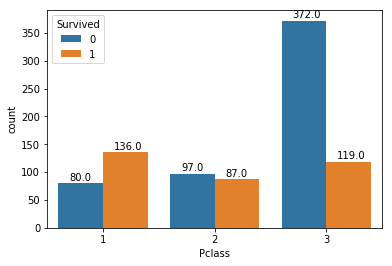

In [15]:
#Checking the survival/death of the people travelling in different class

ax = sns.countplot(x="Pclass", data=titanic_copy, hue = "Survived")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

24% passangers travelling in Pclass 3, 47% passangers travelling in Pclass 2, and 63% passangers travelling in Pclass 1 survived. This clearly indicates that the Passanger Class has direct impact on the survival/death 

## Sex..............................................................................................................................................

In [16]:
titanic_copy["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

65% of the passangers travelling are male

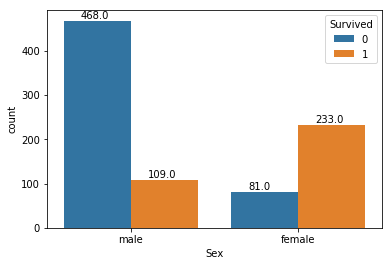

In [17]:
#Checking the survival/death of the people based on Gender

ax = sns.countplot(x="Sex", data=titanic_copy, hue = "Survived")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

74% of the total females survived whereas only 19% of the total males survived which aagin shows the huge impact of gender directly on survival/death

## Age..............................................................................................................................................

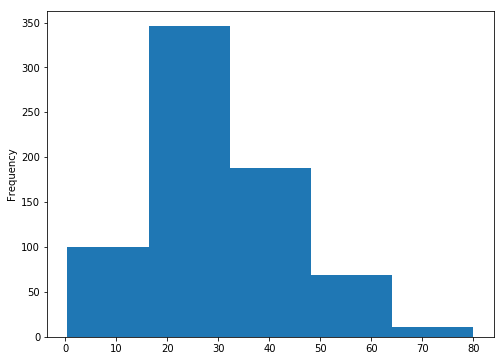

In [18]:
# The distribution of the Age
titanic_copy["Age"].plot(kind = "hist", bins= 5, figsize = (8,6))

So the major population onboard is in their 20's. Now we still need to fill up the remaining values of "Age". Now logically the parameters like "Mr/Mrs/Miss.." and "travelling with family/alone" should help us to identify the ages. As Pclass is directly correlated with our target variable "Survived" I would also analyse whether Pclass has any affects on "Age or not 

Prefix Mr- Mean: 32.37, Median: 30.0, Std: 12.71
Prefix Mrs- Mean: 35.9, Median: 35.0, Std: 11.43
Prefix Miss- Mean: 21.77, Median: 21.0, Std: 12.99
Prefix Master- Mean: 4.57, Median: 3.5, Std: 3.62
Prefix Misc- Mean: 42.38, Median: 44.5, Std: 13.2


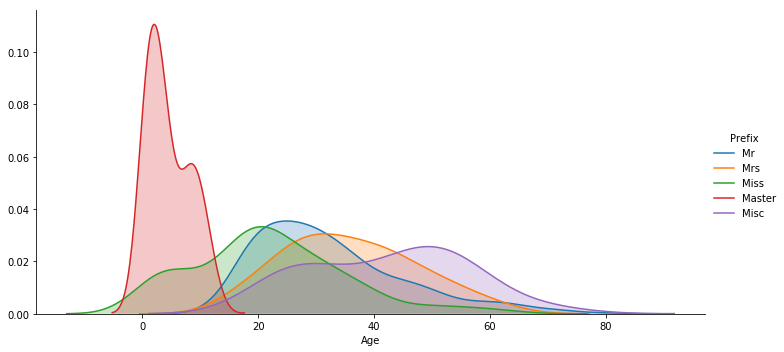

In [19]:
prefixes = ["Mr", "Mrs", "Miss", "Master", "Misc"]

for x in prefixes:
    print("Prefix {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Prefix"] == x]["Age"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Prefix"] == x]["Age"].median(),2),
                                                        round(titanic_copy[titanic_copy["Prefix"] == x]["Age"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Prefix", aspect=2, height =5)
figure.map(sns.kdeplot, "Age", shade = True)
figure.add_legend()

We can see how different "Title" affect the "Age" directly. We can clearly see that kids have been provided with "Master" title. So while filling up the null values of Age, this findings will be pretty helpful

Family 0- Mean: 32.22, Median: 29.5, Std: 12.9
Family 1- Mean: 26.41, Median: 26.0, Std: 15.83


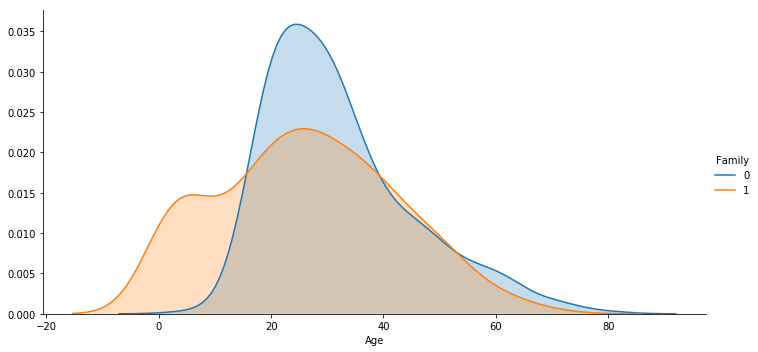

In [20]:
family = [0,1]

for x in family:
    print("Family {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Family"] == x]["Age"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Family"] == x]["Age"].median(),2),
                                                        round(titanic_copy[titanic_copy["Family"] == x]["Age"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Family", aspect=2, height =5)
figure.map(sns.kdeplot, "Age", shade = True)
figure.add_legend()

There is no such a huge difference in mean or median of these parameter....but still we would consider it as it might create a huge difference when combining the different parameters

Pclass 1- Mean: 38.23, Median: 37.0, Std: 14.8
Pclass 2- Mean: 29.88, Median: 29.0, Std: 14.0
Pclass 3- Mean: 25.14, Median: 24.0, Std: 12.5


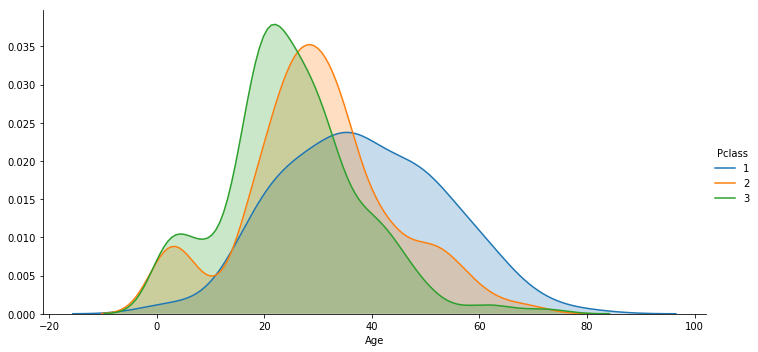

In [21]:
pclass = [1,2,3]

for x in pclass:
    print("Pclass {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Age"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Age"].median(),2),
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Age"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Pclass", aspect=2, height =5)
figure.map(sns.kdeplot, "Age", shade = True)
figure.add_legend()

We do see significant age difference in the people travelling in class 1 and 3. So we will consider Pclass while computing the age

Sex male- Mean: 30.73, Median: 29.0, Std: 14.68
Sex female- Mean: 27.92, Median: 27.0, Std: 14.11


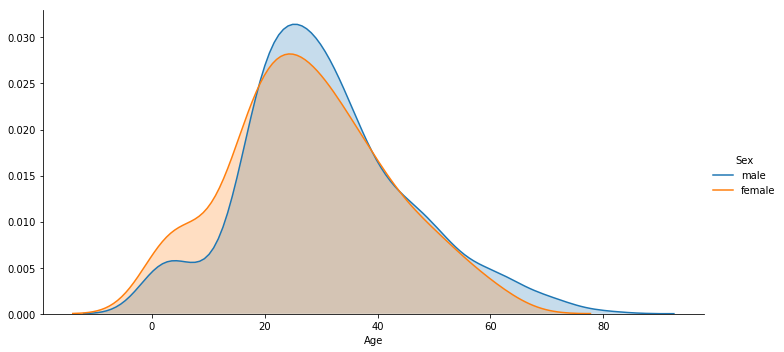

In [22]:
sex = ["male", "female"]

for x in sex:
    print("Sex {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Sex"] == x]["Age"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Sex"] == x]["Age"].median(),2),
                                                        round(titanic_copy[titanic_copy["Sex"] == x]["Age"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Sex", aspect=2, height =5)
figure.map(sns.kdeplot, "Age", shade = True)
figure.add_legend()

Not a significant difference in the Age of a Male or Female and almost same Standard deviation for both of the Genders. So we will not consider this paramter to compute the Age

Now combining Pclass, Prefix, and Family parameter to fill the null values of ages.....

In [23]:
age_df = pd.DataFrame(round(titanic_copy.groupby(["Pclass", "Prefix", "Family"])["Age"].median(), 2))
age_df.reset_index(inplace = True)
age_df.head(3)

,Pclass,Prefix,Family,Age
0,1,Master,1,4.0
1,1,Misc,0,39.0
2,1,Misc,1,49.0


In [24]:
#Function that will compare the conditions of age_df with titanic_copy
def fill_age(row):
    condition = (
        (age_df['Pclass'] == row['Pclass']) & 
        (age_df['Prefix'] == row['Prefix']) & 
        (age_df['Family'] == row['Family'])
    ) 
    return age_df[condition]['Age'].values[0]

#Function that will fill up the null values if the conditions match for both the dataframes 
def process_age():
    global titanic_copy
    # a function that fills the missing values of the Age variable
    titanic_copy['Age'] = titanic_copy.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return titanic_copy

titanic_copy = process_age()
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
Prefix         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


So from above we can see that the null values of "Age" column has been filled

## Embarked.........................................................................................................................................

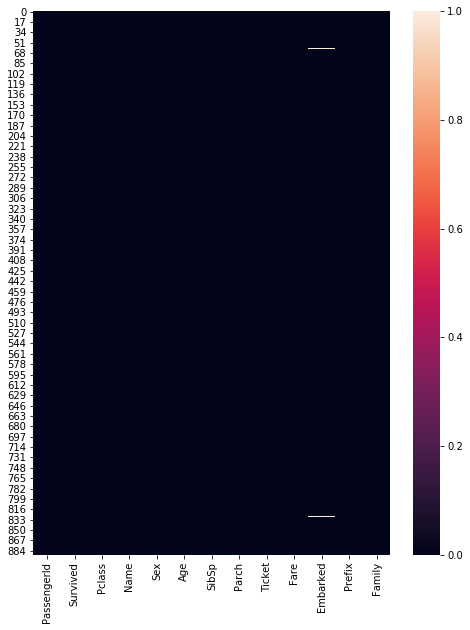

In [25]:
#Identify the missing values using Heatmap
plt.figure(figsize=(8,10))
sns.heatmap(titanic_copy.isnull())

Here are the 2 locations where Embark values are missing

In [26]:
titanic_copy.iloc[[61, 829]] #Locations where Embark values are missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs,0


In [27]:
titanic_copy["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We can observe that alomst 72% of the population embarked from Southampton. Still I would try to use "Fare" and "Pclass" to see whether we can get any information from there or not

In [28]:
embark = ["S", "C", "Q"]
c1 = titanic_copy["Pclass"] == 1 

for x in embark:
    c2 = titanic_copy["Embarked"] == x
    titanic_copy[c1 & c2]
    print("Embarkment {}  and Pclass 1: Mean: {}, Median: {}, std: {}".format(x,
                                                                round(titanic_copy[c1 & c2]["Fare"].mean(),2),
                                                                round(titanic_copy[c1 & c2]["Fare"].median(),2),
                                                                round(titanic_copy[c1 & c2]["Fare"].std(),2)))

Embarkment S  and Pclass 1: Mean: 70.36, Median: 52.0, std: 58.81
Embarkment C  and Pclass 1: Mean: 104.72, Median: 78.27, std: 99.09
Embarkment Q  and Pclass 1: Mean: 90.0, Median: 90.0, std: 0.0


"Q" seems to be promising with closer fare price to 80 and no standard deviation so let's see how did that become possible

In [29]:
titanic_copy[titanic_copy["Embarked"]=="Q"]["Pclass"].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

There are just two people who embarked from Queenstown so the data is not large enough to predict enough. Therefore, I will replace the null values with "S" as it has the lowest standard deviation in its values, as well as more data points, and close value to 80 as well

In [30]:
titanic_copy.iloc[[61, 829], 10] = "S"
titanic_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Prefix         891 non-null object
Family         891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


So there is no null values exist in the dataframe anymore

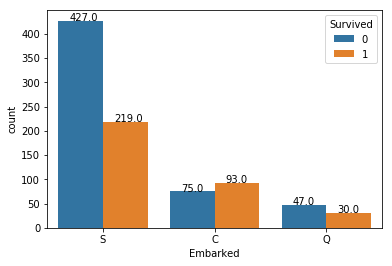

In [31]:
ax = sns.countplot(x = "Embarked", data = titanic_copy, hue = "Survived")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

66% of the people who Embarked from "S" died. Logically Embarking should not affect the death rate but statistically it can

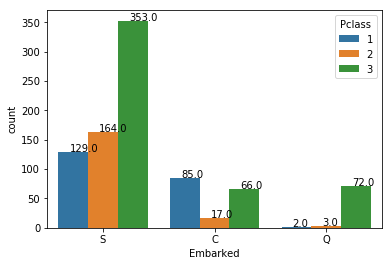

In [32]:
ax = sns.countplot(x = "Embarked", data = titanic_copy, hue = "Pclass")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

Passangers who are travelling in Class 3 have embarked from all the stations                                                   
Very few people embarked from Queenstown in class 1 and 2              
People who embarked from Cherbourg travelled in class 1 and 3            
Ultimately, there is no specific trend that I can see in this data

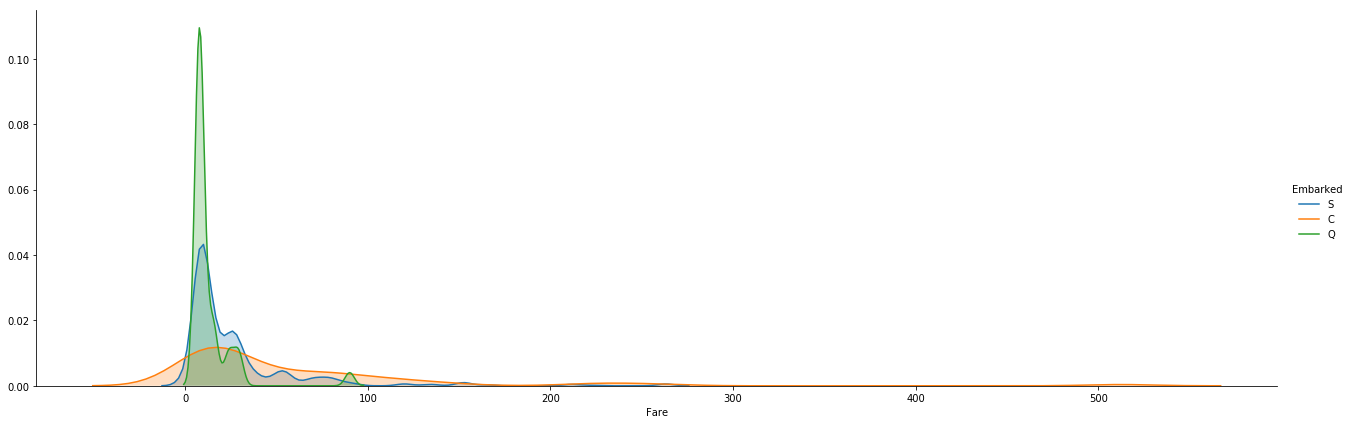

In [33]:
plott = sns.FacetGrid(titanic_copy, hue = "Embarked", aspect = 3, height = 6)
plott.map(sns.kdeplot, "Fare", shade = True)
plott.add_legend()

Similarly people have paid wide range of Fares who embarked from various stations

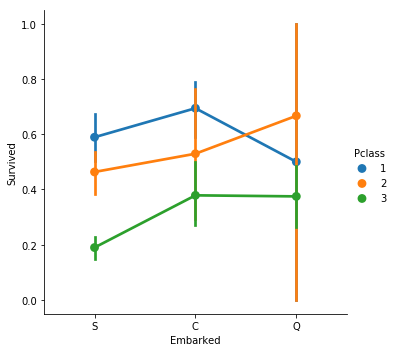

In [34]:
sns.catplot(x = "Embarked", y = "Survived", data = titanic_copy, hue = "Pclass", kind="point")

Neither the trend is clear in the plot above. So I decided not to consider "Embark" parameter

## Ticket...........................................................................................................................................

In [35]:
titanic_copy["Ticket"].nunique()

681

There are 681 unique tickets have been distributed

In [36]:
titanic_copy[titanic_copy["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
159,160,0,3,"Sage, Master. Thomas Henry",male,4.0,8,2,CA. 2343,69.55,S,Master,1
180,181,0,3,"Sage, Miss. Constance Gladys",female,9.0,8,2,CA. 2343,69.55,S,Miss,1
201,202,0,3,"Sage, Mr. Frederick",male,26.0,8,2,CA. 2343,69.55,S,Mr,1
324,325,0,3,"Sage, Mr. George John Jr",male,26.0,8,2,CA. 2343,69.55,S,Mr,1
792,793,0,3,"Sage, Miss. Stella Anna",female,9.0,8,2,CA. 2343,69.55,S,Miss,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,26.0,8,2,CA. 2343,69.55,S,Mr,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,9.0,8,2,CA. 2343,69.55,S,Miss,1


It is the whole Family and everyone died

In [37]:
titanic_copy[titanic_copy["Ticket"] == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,Mr,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,Mr,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,Mr,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,Mr,0


All these people are travelling alone. One of them survived

In [38]:
titanic_copy[titanic_copy["Ticket"] == "347077"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,Mrs,1
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,S,Master,1
233,234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,S,Miss,1
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,S,Master,1


Seems to be one family. Every one survived except one male kid. There is no correlation in these 3 examples of the ticket analysis

After thoroughly analysing the data and checking the records for different ticket numbers I found that there is no specific correlation that can be established which can eventually help to predict the Survival/death of the passanger. So I will not consider the Ticket parameter in the future as well

## Fare............................................................................................................................................

Pclass 1- Mean: 84.15, Median: 60.29, Std: 78.38
Pclass 2- Mean: 20.66, Median: 14.25, Std: 13.42
Pclass 3- Mean: 13.68, Median: 8.05, Std: 11.78


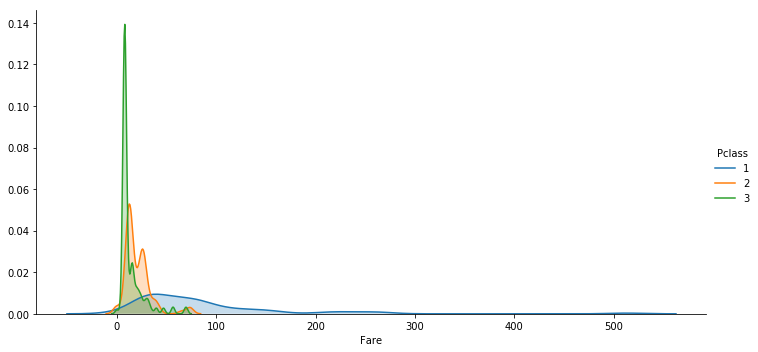

In [39]:
pclass = [1,2,3]

for x in pclass:
    print("Pclass {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Fare"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Fare"].median(),2),
                                                        round(titanic_copy[titanic_copy["Pclass"] == x]["Fare"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Pclass", aspect=2, height =5)
figure.map(sns.kdeplot, "Fare", shade = True)
figure.add_legend()

Although Fare is little wide spread, it is clear from the values above that Fare is directly proportional to the Passanger class which is significantly related to survival/death of the passanger

Survived 0- Mean: 22.12, Median: 10.5, Std: 31.39
Survived 1- Mean: 48.4, Median: 26.0, Std: 66.6


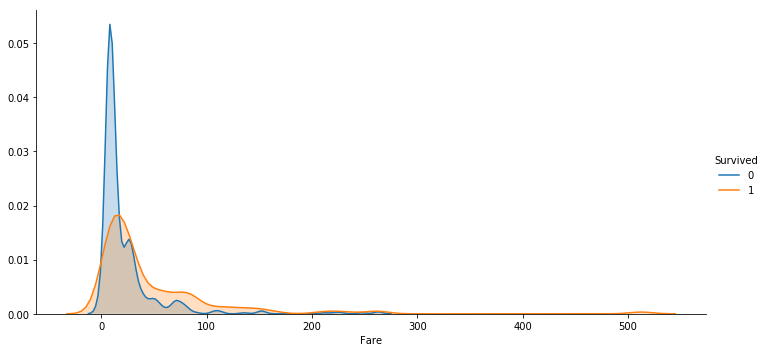

In [40]:
survival = [0,1]

for x in survival:
    print("Survived {}- Mean: {}, Median: {}, Std: {}".format(x,
                                                        round(titanic_copy[titanic_copy["Survived"] == x]["Fare"].mean(),2),
                                                        round(titanic_copy[titanic_copy["Survived"] == x]["Fare"].median(),2),
                                                        round(titanic_copy[titanic_copy["Survived"] == x]["Fare"].std(),2)))
    
figure = sns.FacetGrid(titanic_copy, hue = "Survived", aspect=2, height =5)
figure.map(sns.kdeplot, "Fare", shade = True)
figure.add_legend()

Even it is statistically correlated with survival and death of the passanger. This plot simply suggest that paying more fare will lead you to your survival

I analysed this more to see how it affects the death/survival of the passanger. I used median values [60.29, 24.25, and 8.05] which we got above when analysing the data based on "Pclass"

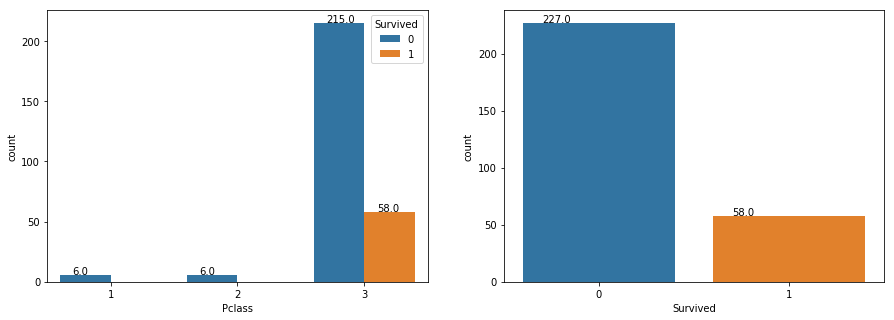

In [41]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(x = "Pclass", data = titanic_copy[titanic_copy["Fare"] <= 8.05], hue = "Survived", ax = ax[0])
sns.countplot(x = "Survived", data = titanic_copy[titanic_copy["Fare"] <= 8.05], ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
        
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
        


Almost half of the people (~56%) travelling in Pclass 3 (Total 491) have bought the tickets which cost 8.05 or less and 79% of them died. 100% death rate for travelling in Pclass 1 and 2 with cheap tickets 

The overall death rate is 79.6% when buying the tickets costing 8.05 or less

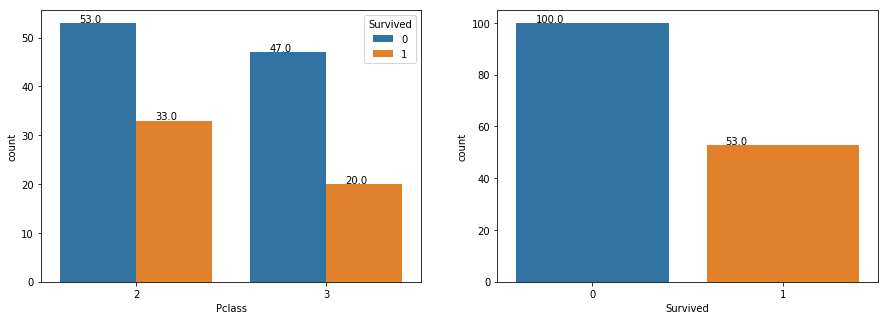

In [42]:
c1 = titanic_copy["Fare"] > 8.05
c2 = titanic_copy["Fare"] <= 14.25

fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x = "Pclass", data = titanic_copy[c1 & c2], hue = "Survived", ax = ax[0])
sns.countplot(x = "Survived", data = titanic_copy[c1 & c2], ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

There is no passanger from Pclass 1 over here                                                                               
Almost half of the Pclass 2 is here (47.8%) (86 out of 184)                                                                      
Death rate is 70% for Pclass 3 and 64% for Pclass 2. If we see the overall death rate than it is 65%

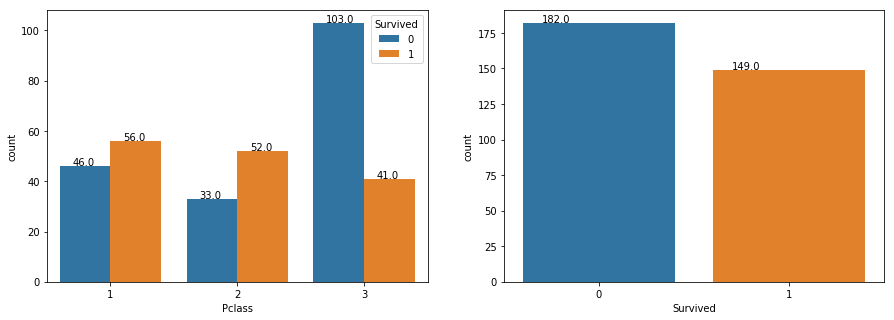

In [43]:
c1 = titanic_copy["Fare"] > 14.25
c2 = titanic_copy["Fare"] <= 60.29

fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x = "Pclass", data = titanic_copy[c1 & c2], hue = "Survived", ax = ax[0])
sns.countplot(x = "Survived", data = titanic_copy[c1 & c2], ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

We can see all the different passanger classes over here. The death rate is still higher in Pclass 3. 71.5% of the people of Pclass 3 died whereas for the other two classes survival rate is higher than the death rate. If we see the overall death rate than it is 55%

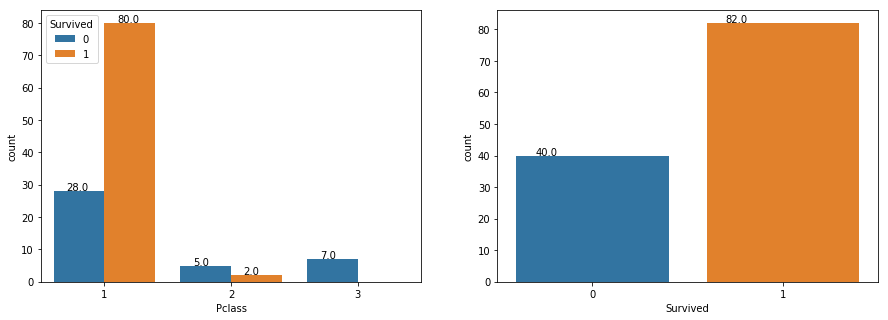

In [44]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.countplot(x = "Pclass", data = titanic_copy[titanic_copy["Fare"] > 60.29], hue = "Survived", ax = ax[0])
sns.countplot(x = "Survived", data = titanic_copy[titanic_copy["Fare"] > 60.29 ], ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))

With the most expensve tickets people travelling in Pclass 1 and therefore there survival chances are 74%. There are very few passangers from Pclass 2 and Pclass 3. But again Pclass 3 has the highest death rate that is 100%. Overall death rate is 32.8%

Two things get crystal clear from all the plots above that                                                                     
1) As the Fare increased the death rate decreased                                                                               
2) Fare is definitely greatly correlated with Passanger Class

Creating Fare bins based on the analysis above

In [45]:
#All the values which used here are based on the median values of "Fare" for different "Pclass"
def fare_bin(fare):
    
    if fare <= 8.05:
        return "bin1"
    elif fare > 8.05 and fare <= 14.25:
        return "bin2"
    elif fare > 14.25 and fare <= 60.29:
        return "bin3"
    else:
        return "bin4"

In [46]:
titanic_copy["fare_bin"] = titanic_copy["Fare"].apply(fare_bin)
titanic_copy.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,bin1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,bin4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,bin1


## [SibSp, Parch, Family] Together..................................................................................................

### People Travelling Alone

Mean: 31.66294227188082, Median: 28.0, Std: 11.848742970610918


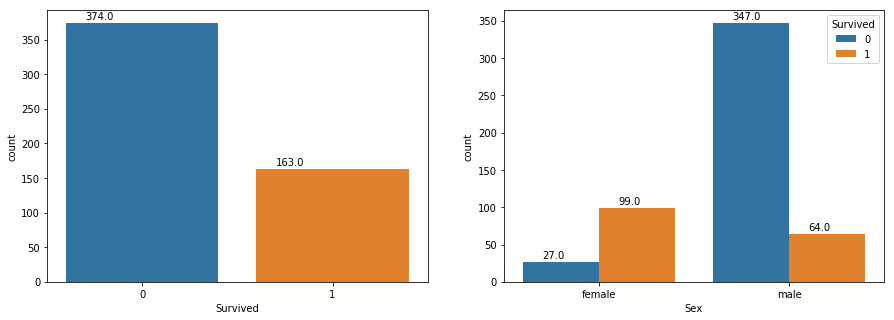

In [47]:
print("Mean: {}, Median: {}, Std: {}".format(titanic_copy[titanic_copy["Family"] == 0]["Age"].mean(),
                                             titanic_copy[titanic_copy["Family"] == 0]["Age"].median(),
                                             titanic_copy[titanic_copy["Family"] == 0]["Age"].std()))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[titanic_copy["Family"] == 0]["Survived"], ax = ax[0])
sns.countplot(titanic_copy[titanic_copy["Family"] == 0]["Sex"], 
              hue=titanic_copy[titanic_copy["Family"] == 0]["Survived"], 
              ax = ax[1])


for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

70% people died when travelling alone                                                                                          
Out of total male population travelling alone, 84% males died                                                                 
Out of total female population travelling alone, 78.5% females survived                                                        
The avg age of the person about 32 years

### People Not Travelling Alone

Mean: 25.782966101694914, Median: 26.0, Std: 15.502120825900915


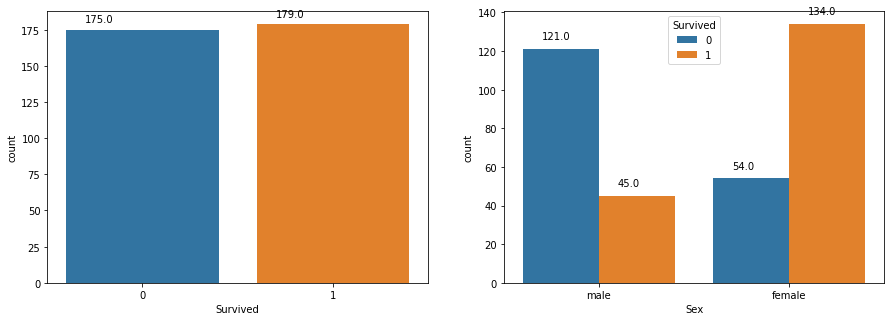

In [48]:
print("Mean: {}, Median: {}, Std: {}".format(titanic_copy[titanic_copy["Family"] == 1]["Age"].mean(),
                                             titanic_copy[titanic_copy["Family"] == 1]["Age"].median(),
                                             titanic_copy[titanic_copy["Family"] == 1]["Age"].std()))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[titanic_copy["Family"] == 1]["Survived"], ax = ax[0])
sns.countplot(titanic_copy[titanic_copy["Family"] == 1]["Sex"], 
              hue=titanic_copy[titanic_copy["Family"] == 1]["Survived"], 
              ax = ax[1])


for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

50%-50% chance of death/survival when travelling with someone                                                                 
73% of the male died while travelling with someone and 71% of the females survived while travelling with someone

We can conclude from above plots that travelling alone was harmful for Males whereas it was beneficial for the women. Travelling with someone (may be family) increased survival chances of Males where reduced the survival of Females. Therefore, it is required to analyse the family size and its effect on survival/death of a person. Overall, in any scenarion Females seem to have higher chances of survival than Males.

### Analyse family size and type to correlate it with survival/death

#### 1) Group of 2 (mom+child, dad+child)

(38, 14)
Mean: 29.77, Median: 27.5, Std: 17.76


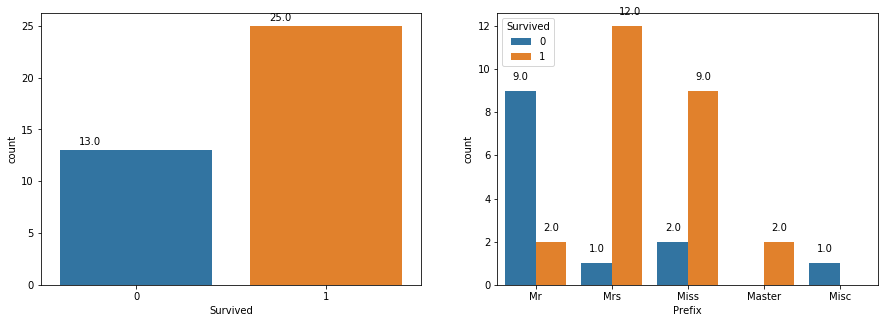

In [49]:
c1 = titanic_copy["SibSp"]  == 0
c2 = titanic_copy["Parch"]  == 1
print(titanic_copy[c1 & c2].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[c1 & c2]["Age"].mean(),2),
                                             round(titanic_copy[c1 & c2]["Age"].median(),2),
                                             round(titanic_copy[c1 & c2]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[c1 & c2]["Survived"], ax = ax[0])
sns.countplot(titanic_copy[c1 & c2]["Prefix"], hue=titanic_copy[c1 & c2]["Survived"], ax= ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

66% of the people survived of the total people travelling in this category. 82% of the "Mr" died whereas 92% of "Mrs" and 82% "Miss" survived. 100% "Master" (Kids) survived. Important thing to consider

#### 2) Group of 2 (2 brothers OR 2 sisters OR Husband+Wife)

(123, 14)
Mean: 31.28, Median: 30.0, Std: 11.43


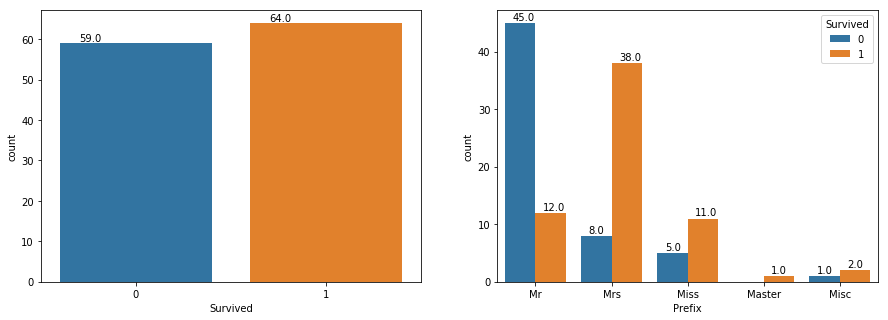

In [50]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["Parch"]  == 0
print(titanic_copy[c1 & c2].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[c1 & c2]["Age"].mean(),2),
                                             round(titanic_copy[c1 & c2]["Age"].median(),2),
                                             round(titanic_copy[c1 & c2]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[c1 & c2]["Survived"], ax = ax[0])
sns.countplot(titanic_copy[c1 & c2]["Prefix"], hue=titanic_copy[c1 & c2]["Survived"], ax=ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

66% of the people survived of the total people travelling in this category.79% of the "Mr" died whereas 83% of "Mrs" and 67% "Miss" survived. 100% "Master" (Kids) survived. Important thing to consider

#### 3) Group of 3 (mom+ 2 child, dad+ 2 child, mom + dad + child)

(86, 14)
Mean: 24.36, Median: 25.5, Std: 16.92


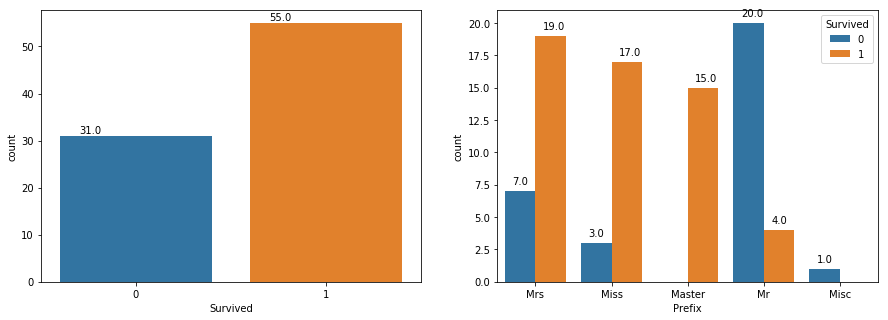

In [51]:
c1 = titanic_copy["SibSp"]  == 0
c2 = titanic_copy["SibSp"]  == 1
c3 = titanic_copy["Parch"]  == 1
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c2 & c3) | (c1 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c2 & c3) | (c1 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c2 & c3) | (c1 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c2 & c3) | (c1 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c2 & c3) | (c1 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c2 & c3) | (c1 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

64% of the people survived of the total people travelling in this category. 83% of the "Mr" died whereas 73% of "Mrs" and 85% "Miss" survived. 100% "Master" (Kids) survived. Important thing to consider

#### 4) Group of 4 people (Mother+Father+2 Child)

(19, 14)
Mean: 20.15, Median: 24.0, Std: 14.27


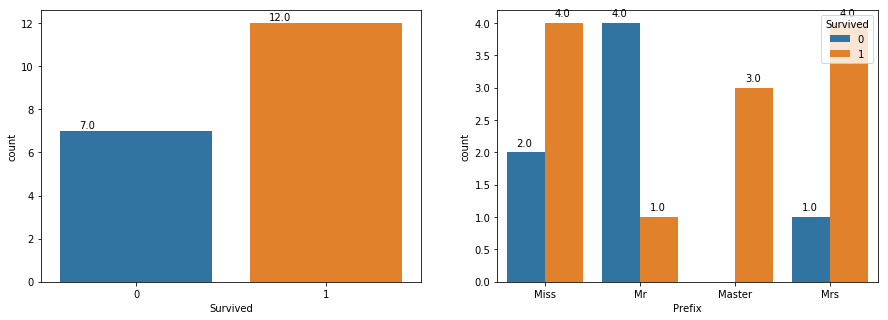

In [52]:
c1 = titanic_copy["SibSp"]  == 1 
c2 = titanic_copy["Parch"]  == 2
print(titanic_copy[c1 & c2].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[c1 & c2]["Age"].mean(),2),
                                             round(titanic_copy[c1 & c2]["Age"].median(),2),
                                             round(titanic_copy[c1 & c2]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[c1 & c2]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[c1 & c2], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))

66% of the people survived of the total people travelling in this category.....80% of the "Mr" died whereas 80% of the "Mrs" survived and 67% of the "Miss" survived. Again 100% "Master" survived.  

#### 5) Group of 5 people (Mother+Father+3 Child )

(7, 14)
Mean: 26.71, Median: 21.0, Std: 17.16


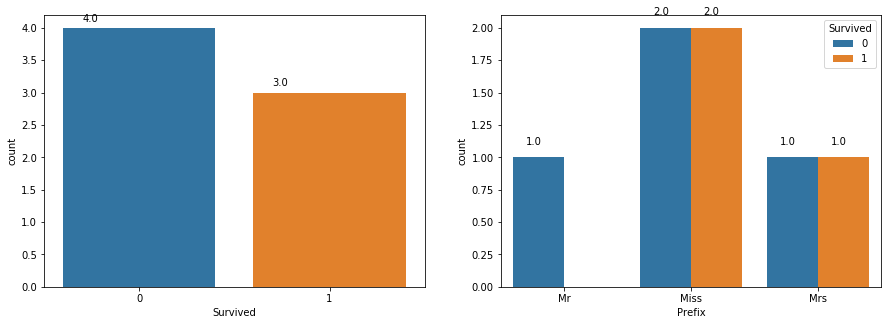

In [53]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["SibSp"]  == 2
c3 = titanic_copy["Parch"]  == 3
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))

for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))

Very few data points to perform any strong analysis. From the plot above we can see that 100% "Mr" died whereas 50% "Mrs" and 50% "Miss" Survived. Their survival chances decreased way lesser than above all the other possibilities

#### 6) Group of 6 people (Mother+Father+4 Child )

(10, 14)
Mean: 24.0, Median: 21.0, Std: 20.08


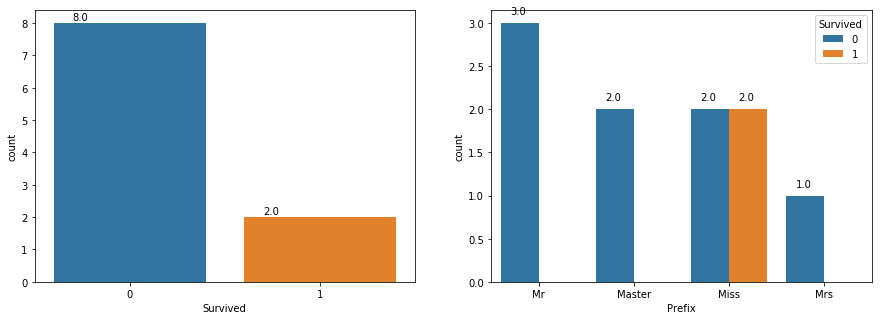

In [54]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["SibSp"]  == 3
c3 = titanic_copy["Parch"]  == 4
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))



There are very high chances of death in group of 6 which we can observe from the plot above

#### 7) Group of 7 people (Mother+Father+ 5 Child )

(12, 14)
Mean: 15.17, Median: 9.0, Std: 14.73


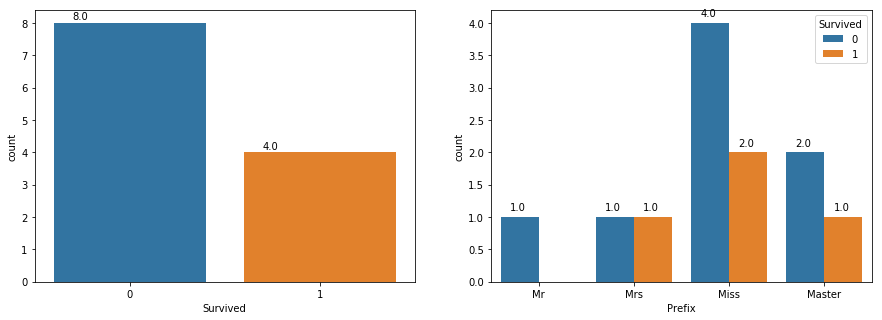

In [55]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["SibSp"]  == 4
c3 = titanic_copy["Parch"]  == 5
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))



We oberve the same thing as group 6 in this particular group of 7

#### 8) Group of 8 people (Mother+Father+ 6 Child )

(6, 14)
Mean: 15.67, Median: 12.5, Std: 14.36


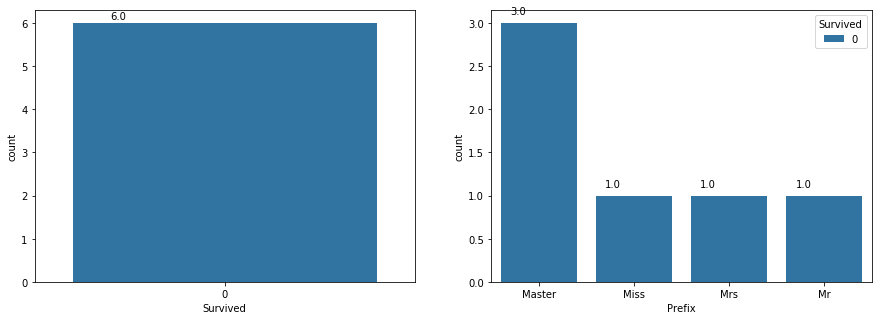

In [56]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["SibSp"]  == 5
c3 = titanic_copy["Parch"]  == 6
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))



seems that there is only one such family exist who have 8 members in their family and the whole family died. there are just 6 records given in this training dataset so the other two data points has to be in the test dataset and probably they must have died as well 

#### 9) Group of 11 people (Mother+Father+ 9 Child )

(7, 14)
Mean: 15.57, Median: 9.0, Std: 9.91


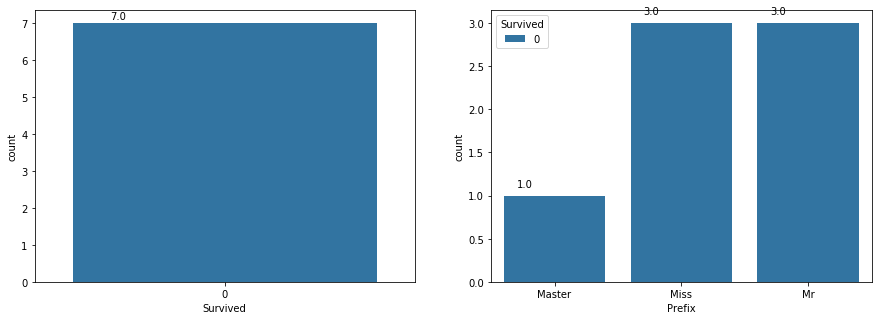

In [57]:
c1 = titanic_copy["SibSp"]  == 1
c2 = titanic_copy["SibSp"]  == 8
c3 = titanic_copy["Parch"]  == 9
c4 = titanic_copy["Parch"]  == 2
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))



seems that there is only one such family exist who have 11 members in their family and the whole family died. there are just 7 records given in this training dataset so the other 4 data points has to be in the test dataset and probably they must have died as well 

#### 10) Single Parent + Many kids 

(27, 14)
Mean: 10.98, Median: 7.0, Std: 11.58


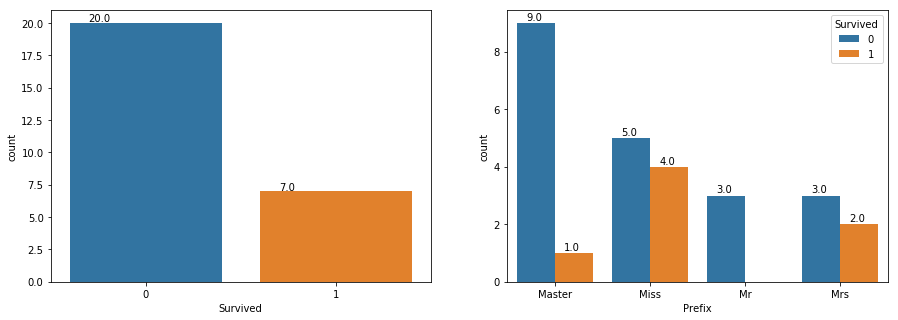

In [58]:
c1 = titanic_copy["SibSp"]  == 0
c2 = titanic_copy["SibSp"]  >= 2
c3 = titanic_copy["Parch"]  >= 3
c4 = titanic_copy["Parch"]  == 1
print(titanic_copy[(c1 & c3) | (c2 & c4)].shape)

print("Mean: {}, Median: {}, Std: {}".format(round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].mean(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].median(),2),
                                             round(titanic_copy[(c1 & c3) | (c2 & c4)]["Age"].std(),2)))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[(c1 & c3) | (c2 & c4)]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[(c1 & c3) | (c2 & c4)], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.1))



Death rate is very high in this case which is 75% overall

#### 11) Brothers / Sisters

(18, 14)
Mean: 29.88888888888889, Median: 27.0, Std: 11.615855740115034


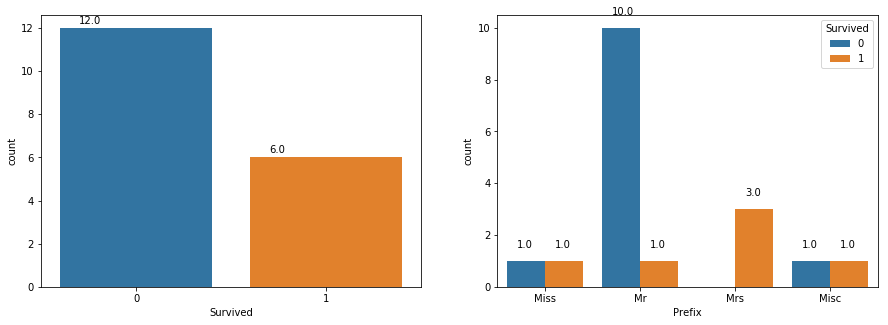

In [59]:
c1 = titanic_copy["SibSp"]  >= 2 
c2 = titanic_copy["Parch"]  == 0
print(titanic_copy[c1 & c2].shape)

print("Mean: {}, Median: {}, Std: {}".format(titanic_copy[c1 & c2]["Age"].mean(),
                                             titanic_copy[c1 & c2]["Age"].median(),
                                             titanic_copy[c1 & c2]["Age"].std()))

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(titanic_copy[c1 & c2]["Survived"], ax = ax[0])
sns.countplot(x = "Prefix", data = titanic_copy[c1 & c2], hue = "Survived", ax = ax[1])

for p in ax[0].patches:
        ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
for p in ax[1].patches:
        ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))

67% Death Rate

After summing the number of data, I figured out that there is one data point stil mising which did not fall in any of these categories and that is the only kind of data point exist in the dataframe. That is passanger id 437

In [60]:
titanic_copy.iloc[437]

PassengerId                                      438
Survived                                           1
Pclass                                             2
Name           Richards, Mrs. Sidney (Emily Hocking)
Sex                                           female
Age                                               24
SibSp                                              2
Parch                                              3
Ticket                                         29106
Fare                                           18.75
Embarked                                           S
Prefix                                           Mrs
Family                                             1
fare_bin                                        bin3
Name: 437, dtype: object

I am going to define this record as "Unique" while creating the group sizes

In [61]:
def group_size(cols):
    SibSp = cols[0]
    Parch = cols[1]
    
    if SibSp == 0 and Parch == 0:
        return "alone"
    elif SibSp == 0 and Parch == 1:
        return "parent_kid"
    elif SibSp == 1 and Parch == 0:
        return "bro_sis"
    elif (SibSp == 1 and Parch == 1) or (SibSp == 0 and Parch == 2):
        return "group_of_3"
    elif SibSp == 1 and Parch == 2:
        return "group_of_4"
    elif (SibSp == 1 and Parch == 3) or (SibSp == 2 and Parch == 2):
        return "group_of_5"
    elif (SibSp == 1 and Parch == 4) or (SibSp == 3 and Parch == 2):
        return "group_of_6"
    elif (SibSp == 1 and Parch == 5) or (SibSp == 4 and Parch == 2):
        return "group_of_7"
    elif (SibSp == 1 and Parch == 6) or (SibSp == 5 and Parch == 2):
        return "group_of_8"
    elif (SibSp == 1 and Parch == 9) or (SibSp == 8 and Parch == 2):
        return "group_of_11"
    elif (SibSp == 0 and Parch >= 3) or (SibSp >= 2 and Parch == 1):
        return "parent_kids"
    elif SibSp >= 2 and Parch == 0:
        return "bros_sises"
    else:
        return "unique"
       


In [62]:
titanic_copy["Group_Size"] = titanic_copy[["SibSp", "Parch"]].apply(group_size, axis = 1)
titanic_copy.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,fare_bin,Group_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,bin1,bro_sis
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,bin4,bro_sis
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,bin1,alone


In [63]:
def age_group(Age):
    
    if Age <= 15: 
        return "Child"
    elif Age > 15 and Age <= 30:
        return "Adult"
    elif Age > 30 and Age <=45:
        return "Senior"
    elif Age > 45 and Age <=60:
        return "Super_senior"
    else:
        return "Old"

In [64]:
titanic_copy["Age_Group"] = titanic_copy["Age"].apply(age_group)
titanic_copy.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,fare_bin,Group_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,bin1,bro_sis,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,bin4,bro_sis,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,bin1,alone,Adult


Now I just want to focus on the required columns and drop other ones. I will again make another copy of the dataframe so in case if I mess up nothing would change in "titanic_copy" dataframe

In [65]:
required_df = titanic_copy.copy()
required_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Prefix,Family,fare_bin,Group_Size,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1,bin1,bro_sis,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1,bin4,bro_sis,Senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,bin1,alone,Adult


In [66]:
required_df.drop(["Name", "Ticket", "Embarked","Family","SibSp","Parch"], axis =1, inplace = True)
required_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Prefix,fare_bin,Group_Size,Age_Group
0,1,0,3,male,22.0,7.2500,Mr,bin1,bro_sis,Adult
1,2,1,1,female,38.0,71.2833,Mrs,bin4,bro_sis,Senior
2,3,1,3,female,26.0,7.9250,Miss,bin1,alone,Adult


In [67]:
dummies = pd.get_dummies(required_df[["PassengerId", "Sex", "Prefix","fare_bin","Group_Size","Age_Group"]])
dummies.head(3)

,PassengerId,Sex_female,Sex_male,Prefix_Master,Prefix_Misc,Prefix_Miss,Prefix_Mr,Prefix_Mrs,fare_bin_bin1,fare_bin_bin2,...,Group_Size_group_of_7,Group_Size_group_of_8,Group_Size_parent_kid,Group_Size_parent_kids,Group_Size_unique,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_senior
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
required_df = pd.merge(required_df, dummies, on = "PassengerId")
required_df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Prefix,fare_bin,Group_Size,Age_Group,...,Group_Size_group_of_7,Group_Size_group_of_8,Group_Size_parent_kid,Group_Size_parent_kids,Group_Size_unique,Age_Group_Adult,Age_Group_Child,Age_Group_Old,Age_Group_Senior,Age_Group_Super_senior
0,1,0,3,male,22.0,7.2500,Mr,bin1,bro_sis,Adult,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,female,38.0,71.2833,Mrs,bin4,bro_sis,Senior,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,female,26.0,7.9250,Miss,bin1,alone,Adult,...,0,0,0,0,0,1,0,0,0,0


In [69]:
print("Shape of required_df: {}".format(required_df.shape))
print("Shape of required_df: {}".format(dummies.shape))


Shape of required_df: (891, 39)
Shape of required_df: (891, 30)


I have just kept the passanger Id column for ease of operation such as merging or joint or anything like that. Looking at the shape of both the dataframes it seems that merging is successfuly performed

In [70]:
required_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Prefix',
       'fare_bin', 'Group_Size', 'Age_Group', 'Sex_female', 'Sex_male',
       'Prefix_Master', 'Prefix_Misc', 'Prefix_Miss', 'Prefix_Mr',
       'Prefix_Mrs', 'fare_bin_bin1', 'fare_bin_bin2', 'fare_bin_bin3',
       'fare_bin_bin4', 'Group_Size_alone', 'Group_Size_bro_sis',
       'Group_Size_bros_sises', 'Group_Size_group_of_11',
       'Group_Size_group_of_3', 'Group_Size_group_of_4',
       'Group_Size_group_of_5', 'Group_Size_group_of_6',
       'Group_Size_group_of_7', 'Group_Size_group_of_8',
       'Group_Size_parent_kid', 'Group_Size_parent_kids', 'Group_Size_unique',
       'Age_Group_Adult', 'Age_Group_Child', 'Age_Group_Old',
       'Age_Group_Senior', 'Age_Group_Super_senior'],
      dtype='object')

# TEST FILE

I have worked on the test file seperately and not in combination of the train file just for my own ease

In [71]:
test_titanic = pd.read_csv("test.csv")
test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [72]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [73]:
#Family or Alone

test_titanic["Family"] = test_titanic[["SibSp", "Parch"]].apply(alone, axis = 1)
test_titanic["Family"].loc[test_titanic["Family"]>0] = 1
test_titanic["Family"].loc[test_titanic["Family"]==0] = 0
test_titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [74]:
#Creating a new column "Prefix" which will have all the values like "Mr", "Mrs", "Miss" etc...
test_titanic["Prefix"] = test_titanic["Name"].apply(person_status)

test_titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs


In [75]:
for i in range(0, len(test_titanic)):
    if test_titanic["Prefix"][i] not in ["Mr", "Mrs", "Miss", "Master"]:
        test_titanic["Prefix"][i] = "Misc"
test_titanic.head(3)

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr


In [76]:
#All the values are filled up

sum(test_titanic["Prefix"].value_counts())

418

While computing the "Age" parameter I figured out that the way I have computed the ages in the train dataset doesn't exactly go for test datset as well. There are couple of rows which have different values than what we saw in the train dataset so I have to put the ages manually there

In [77]:
# 1)

test_titanic.iloc[88]

PassengerId                        980
Pclass                               3
Name           O'Donoghue, Ms. Bridget
Sex                             female
Age                                NaN
SibSp                                0
Parch                                0
Ticket                          364856
Fare                              7.75
Cabin                              NaN
Embarked                             Q
Family                               0
Prefix                            Misc
Name: 88, dtype: object

In [78]:
#I would use the median value of all the Misc of the training dataset

print(titanic_copy[titanic_copy["Prefix"] == "Misc"]["Age"].median())

44.0


In [79]:
test_titanic.iloc[88,4] = 44

In [80]:
# 2)

test_titanic.iloc[339]

PassengerId                     1231
Pclass                             3
Name           Betros, Master. Seman
Sex                             male
Age                              NaN
SibSp                              0
Parch                              0
Ticket                          2622
Fare                          7.2292
Cabin                            NaN
Embarked                           C
Family                             0
Prefix                        Master
Name: 339, dtype: object

In [81]:
#I would use the median value of all the Misc of the training dataset

titanic_copy[titanic_copy["Prefix"] == "Master"]["Age"].median()

4.0

In [82]:
test_titanic.iloc[339,4] = 4

In [83]:
#Replacing the Null values of "Age"

def fill_age(row):
    condition = (
        (age_df['Pclass'] == row['Pclass']) & 
        (age_df['Prefix'] == row['Prefix']) & 
        (age_df['Family'] == row['Family'])
    ) 
    return age_df[condition]['Age'].values[0]


def process_age():
    global test_titanic
    # a function that fills the missing values of the Age variable
    test_titanic['Age'] = test_titanic.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return test_titanic

test_titanic = process_age()

In [84]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family         418 non-null int64
Prefix         418 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB


In [85]:
#Using the heatmap we can figure out the Missing Fare location
test_titanic.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Family                          0
Prefix                         Mr
Name: 152, dtype: object

In [86]:
#Simply used same Pclass to fill the value of Fare

titanic_copy[titanic_copy["Pclass"] == 3]["Fare"].median()

8.05

In [87]:
test_titanic.iloc[152,8] = 8.05

In [88]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family         418 non-null int64
Prefix         418 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB


In [89]:
#Group sizes

test_titanic["Group_Size"] = test_titanic[["SibSp", "Parch"]].apply(group_size, axis = 1)

In [90]:
#Age_Group

test_titanic["Age_Group"] = test_titanic["Age"].apply(age_group)

In [91]:
#Fare Bins

test_titanic["fare_bin"] = test_titanic["Fare"].apply(fare_bin)

In [92]:
test_titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Prefix,Group_Size,Age_Group,fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,alone,Senior,bin1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,bro_sis,Super_senior,bin1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,alone,Old,bin2


In [93]:
test_dummies = pd.get_dummies(test_titanic[["PassengerId", "Prefix", "Sex","Age_Group", "Group_Size", "fare_bin"]])
test_dummies.head(3)

,PassengerId,Prefix_Master,Prefix_Misc,Prefix_Miss,Prefix_Mr,Prefix_Mrs,Sex_female,Sex_male,Age_Group_Adult,Age_Group_Child,...,Group_Size_group_of_5,Group_Size_group_of_6,Group_Size_group_of_7,Group_Size_group_of_8,Group_Size_parent_kid,Group_Size_parent_kids,fare_bin_bin1,fare_bin_bin2,fare_bin_bin3,fare_bin_bin4
0,892,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,893,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,894,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [94]:
test_titanic = pd.merge(test_titanic, test_dummies, on = "PassengerId")
test_titanic.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Group_Size_group_of_5,Group_Size_group_of_6,Group_Size_group_of_7,Group_Size_group_of_8,Group_Size_parent_kid,Group_Size_parent_kids,fare_bin_bin1,fare_bin_bin2,fare_bin_bin3,fare_bin_bin4
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,0,0,0,0,0,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,0,0,0,0,0,1,0,0


In [95]:
print("Shape of required_df: {}".format(test_titanic.shape))
print("Shape of required_df: {}".format(test_dummies.shape))

Shape of required_df: (418, 44)
Shape of required_df: (418, 29)


Merging has performed Successfully

## Application of Machine Learning Begins From Here

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, jaccard_similarity_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [97]:
X = required_df[["Pclass", "Age", 'fare_bin_bin2', 'fare_bin_bin3','fare_bin_bin4',
                 "Sex_male", "Prefix_Miss", "Prefix_Mr","Prefix_Mrs",
                 'Group_Size_bro_sis', 'Group_Size_bros_sises', 'Group_Size_group_of_11', 'Group_Size_group_of_3', 
                 'Group_Size_group_of_4', 'Group_Size_group_of_5', 'Group_Size_group_of_6', 'Group_Size_group_of_7', 
                 'Group_Size_group_of_8', 'Group_Size_parent_kid', 'Group_Size_parent_kids']]
                 

y = required_df["Survived"] 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
logreg1 = LogisticRegression(solver="liblinear")
logreg1.fit(X_train, y_train)
logreg1_pred = logreg1.predict(X_test)


print(classification_report(y_test, logreg1_pred))
print(confusion_matrix(y_test, logreg1_pred))
print("Accuracy score: {}".format(accuracy_score(y_test, logreg1_pred)))
print("f1-score: {}".format(f1_score(y_test, logreg1_pred)))
print("jaccard similarity socre: {}".format(jaccard_similarity_score(y_test, logreg1_pred)))


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       175
           1       0.79      0.77      0.78       120

   micro avg       0.82      0.82      0.82       295
   macro avg       0.81      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295

[[150  25]
 [ 28  92]]
Accuracy score: 0.8203389830508474
f1-score: 0.7763713080168777
jaccard similarity socre: 0.8203389830508474


In [99]:
param_grid = {"penalty": ["l2"],
              "C": [0.001, 0.01, 0.1, 1.0, 10, 100],
              "solver": ["liblinear", "newton-cg", "sag", "lbfgs", "saga"]}
grid_model = GridSearchCV(LogisticRegression(), param_grid, cv = 5, verbose =3)
grid_model.fit(X_train, y_train)
pred = grid_model.predict(X_test)
grid_model.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV]  C=0.001, penalty=l2, solver=liblinear, score=0.6271186440677966, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-cg ...........................
[CV]  C=0.001, penalty=l2, solver=newton-cg, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=newton-c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda

[CV] ..... C=0.001, penalty=l2, solver=sag, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV] ..... C=0.001, penalty=l2, solver=sag, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV]  C=0.001, penalty=l2, solver=sag, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV]  C=0.001, penalty=l2, solver=sag, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=sag .................................
[CV]  C=0.001, penalty=l2, solver=sag, score=0.6271186440677966, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ...............................
[CV] ... C=0.001, penalty=l2, solver=lbfgs, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=lbfgs ..............

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .... C=0.001, penalty=l2, solver=saga, score=0.625, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV]  C=0.001, penalty=l2, solver=saga, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV]  C=0.001, penalty=l2, solver=saga, score=0.6302521008403361, total=   0.0s
[CV] C=0.001, penalty=l2, solver=saga ................................
[CV]  C=0.001, penalty=l2, solver=saga, score=0.6271186440677966, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.7583333333333333, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.7416666666666667, total=   0.0s
[CV] C=0.01, penalty=l2, solver=liblinear ............................
[CV]  C=0.01, penalty=l2, solver=liblinear, score=0.7478991596638656, total=   0.0s
[CV] C=0.01

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\li

[CV]  C=0.01, penalty=l2, solver=sag, score=0.7666666666666667, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV]  C=0.01, penalty=l2, solver=sag, score=0.7583333333333333, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV]  C=0.01, penalty=l2, solver=sag, score=0.7647058823529411, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV]  C=0.01, penalty=l2, solver=sag, score=0.7226890756302521, total=   0.0s
[CV] C=0.01, penalty=l2, solver=sag ..................................
[CV]  C=0.01, penalty=l2, solver=sag, score=0.788135593220339, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV] .... C=0.01, penalty=l2, solver=lbfgs, score=0.775, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lbfgs ................................
[CV]  C=0.01, penalty=l2, solver=lbfgs, score=0.7916666666666666, total=   0.0s
[CV] C=0.01, penalty=l2, solver=lb

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, penalty=l2, solver=saga, score=0.7583333333333333, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV]  C=0.01, penalty=l2, solver=saga, score=0.7416666666666667, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV]  C=0.01, penalty=l2, solver=saga, score=0.7478991596638656, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.01, penalty=l2, solver=saga, score=0.7226890756302521, total=   0.0s
[CV] C=0.01, penalty=l2, solver=saga .................................
[CV]  C=0.01, penalty=l2, solver=saga, score=0.7627118644067796, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.7166666666666667, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.8083333333333333, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.7394957983193278, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV]  C=0.1, penalty=l2, solver=liblinear, score=0.8135593220338984, total=   0.0s
[

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ......... C=0.1, penalty=l2, solver=sag, score=0.8, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV]  C=0.1, penalty=l2, solver=sag, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV]  C=0.1, penalty=l2, solver=sag, score=0.7394957983193278, total=   0.0s
[CV] C=0.1, penalty=l2, solver=sag ...................................
[CV]  C=0.1, penalty=l2, solver=sag, score=0.8050847457627118, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, penalty=l2, solver=lbfgs, score=0.7333333333333333, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV]  C=0.1, penalty=l2, solver=lbfgs, score=0.8666666666666667, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV]  C=0.1, penalty=l2, solver=lbfgs, score=0.7394957983193278, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV]  C=0.1, penalty=l2, solver=lbfgs, score=0.7899159663865546, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV]  C=0.1, penalty=l2, solver=lbfgs, score=0.8135593220338984, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.725, total=   0.0s

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=saga, score=0.8083333333333333, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=saga, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=0.1, penalty=l2, solver=saga, score=0.7394957983193278, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................
[CV]  C=0.1, penalty=l2, solver=saga, score=0.8050847457627118, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV]  C=1.0, penalty=l2, solver=liblinear, score=0.7333333333333333, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV]  C=1.0, penalty=l2, solver=liblinear, score=0.8833333333333333, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV]  C=1.0, penalty=l2, solver=liblinear, score=0.7394957983193278, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV]  C=1.0, penalty=l2, solver=liblinear, score=0.8151260504201681, total=   0.0s
[CV] C=1.0, penalty=l2, solver=liblinear .............................
[CV]  C=1.0, penalty=l2, solver=liblinear, score=0.8135593220338984, total=   0.0s
[CV

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, penalty=l2, solver=sag, score=0.7166666666666667, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV] ....... C=1.0, penalty=l2, solver=sag, score=0.825, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV]  C=1.0, penalty=l2, solver=sag, score=0.7142857142857143, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV]  C=1.0, penalty=l2, solver=sag, score=0.7899159663865546, total=   0.0s
[CV] C=1.0, penalty=l2, solver=sag ...................................
[CV]  C=1.0, penalty=l2, solver=sag, score=0.8050847457627118, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV]  C=1.0, penalty=l2, solver=lbfgs, score=0.7583333333333333, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV]  C=1.0, penalty=l2, solver=lbfgs, score=0.8833333333333333, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV]  C=1.0, penalty=l2, solver=lbfgs, score=0.7563025210084033, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV]  C=1.0, penalty=l2, solver=lbfgs, score=0.7983193277310925, total=   0.0s
[CV] C=1.0, penalty=l2, solver=lbfgs .................................
[CV]  C=1.0, penalty=l2, solver=lbfgs, score=0.8135593220338984, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, solver=saga, score=0.725, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV]  C=1.0, penalty=l2, solver=saga, score=0.8083333333333333, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV]  C=1.0, penalty=l2, solver=saga, score=0.7142857142857143, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1.0, penalty=l2, solver=saga, score=0.7394957983193278, total=   0.0s
[CV] C=1.0, penalty=l2, solver=saga ..................................
[CV]  C=1.0, penalty=l2, solver=saga, score=0.8135593220338984, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, score=0.7666666666666667, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, score=0.8583333333333333, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, score=0.7563025210084033, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, score=0.7899159663865546, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV]  C=10, penalty=l2, solver=liblinear, score=0.8135593220338984, total=   0.0s
[CV] C=1

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, score=0.7083333333333334, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV] ........ C=10, penalty=l2, solver=sag, score=0.825, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV]  C=10, penalty=l2, solver=sag, score=0.7142857142857143, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=sag, score=0.7983193277310925, total=   0.0s
[CV] C=10, penalty=l2, solver=sag ....................................
[CV]  C=10, penalty=l2, solver=sag, score=0.8050847457627118, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, score=0.7416666666666667, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.875, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=lbfgs, score=0.7563025210084033, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, score=0.7815126050420168, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV]  C=10, penalty=l2, solver=lbfgs, score=0.8220338983050848, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] ....... C=10, penalty=l2, solver=saga, score=0.725, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV]  C=10, penalty=l2, solver=saga, score=0.8083333333333333, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV]  C=10, penalty=l2, solver=saga, score=0.7142857142857143, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, penalty=l2, solver=saga, score=0.7394957983193278, total=   0.0s
[CV] C=10, penalty=l2, solver=saga ...................................
[CV]  C=10, penalty=l2, solver=saga, score=0.8135593220338984, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .. C=100, penalty=l2, solver=liblinear, score=0.75, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] .. C=100, penalty=l2, solver=liblinear, score=0.85, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, score=0.7563025210084033, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, score=0.7983193277310925, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV]  C=100, penalty=l2, solver=liblinear, score=0.8220338983050848, total=   0.0s
[CV] C=100, penalty=l2, solve

C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=sag, score=0.7142857142857143, total=   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV]  C=100, penalty=l2, solver=sag, score=0.7983193277310925, total=   0.0s
[CV] C=100, penalty=l2, solver=sag ...................................
[CV]  C=100, penalty=l2, solver=sag, score=0.8050847457627118, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=lbfgs, score=0.7583333333333333, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.8333333333333334, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.7563025210084033, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=lbfgs, score=0.773109243697479, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................
[CV]  C=100, penalty=l2, solver=lbfgs, score=0.8220338983050848, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV] ...... C=100, penalty=l2, solver=saga, score=0.725, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, penalty=l2, solver=saga, score=0.8083333333333333, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV]  C=100, penalty=l2, solver=saga, score=0.7142857142857143, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV]  C=100, penalty=l2, solver=saga, score=0.7394957983193278, total=   0.0s
[CV] C=100, penalty=l2, solver=saga ..................................
[CV]  C=100, penalty=l2, solver=saga, score=0.8135593220338984, total=   0.0s


C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Vismay\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.9s finished


{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
logreg2 = LogisticRegression(solver="newton-cg", C = 1, penalty = 'l2')
logreg2.fit(X_train, y_train)
logreg2_pred = logreg2.predict(X_test)


print(classification_report(y_test, logreg2_pred))
print(confusion_matrix(y_test, logreg2_pred))
print("Accuracy score: {}".format(accuracy_score(y_test, logreg2_pred)))
print("f1-score: {}".format(f1_score(y_test, logreg2_pred)))
print("jaccard similarity socre: {}".format(jaccard_similarity_score(y_test, logreg2_pred)))


              precision    recall  f1-score   support

           0       0.84      0.85      0.84       175
           1       0.78      0.76      0.77       120

   micro avg       0.81      0.81      0.81       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.81      0.81      0.81       295

[[149  26]
 [ 29  91]]
Accuracy score: 0.8135593220338984
f1-score: 0.7679324894514769
jaccard similarity socre: 0.8135593220338984


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)
randfor = RandomForestClassifier(n_estimators=100)
randfor.fit(X_train, y_train)
randfor_pred = randfor.predict(X_test)


print(classification_report(y_test, randfor_pred))
print(confusion_matrix(y_test, randfor_pred))
print("Accuracy score: {}".format(accuracy_score(y_test, randfor_pred)))
print("f1-score: {}".format(f1_score(y_test, randfor_pred)))
print("jaccard similarity socre: {}".format(jaccard_similarity_score(y_test, randfor_pred)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       175
           1       0.76      0.72      0.74       120

   micro avg       0.79      0.79      0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295

[[148  27]
 [ 34  86]]
Accuracy score: 0.7932203389830509
f1-score: 0.7381974248927038
jaccard similarity socre: 0.7932203389830509


In [104]:
XX_test = test_titanic[["Pclass", "Age",'fare_bin_bin2', 'fare_bin_bin3','fare_bin_bin4',
                 "Sex_male", "Prefix_Miss", "Prefix_Mr","Prefix_Mrs",
                 'Group_Size_bro_sis', 'Group_Size_bros_sises', 'Group_Size_group_of_11', 'Group_Size_group_of_3', 
                 'Group_Size_group_of_4', 'Group_Size_group_of_5', 'Group_Size_group_of_6', 'Group_Size_group_of_7', 
                 'Group_Size_group_of_8', 'Group_Size_parent_kid', 'Group_Size_parent_kids']]

final_pred = logreg1.predict(XX_test)

In [105]:
submit_df = pd.DataFrame(index=test_titanic["PassengerId"])
submit_df["Survived"] = final_pred
submit_df.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [106]:
submit_df.to_csv("Finalest_Logreg.csv")